In [17]:
library(Seurat)
library(ggplot2)
library(ggrepel)
library(pheatmap)

In [2]:
CD45pPBMC.NK <- readRDS("/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.integrated.nk.rds")

In [4]:
Idents(CD45pPBMC.NK) <- CD45pPBMC.NK$classI
Bl1 <- FindMarkers(CD45pPBMC.NK,assay = "RNA",only.pos = F,group.by = "HPV", ident.1 = "Pos",subset.ident = "Bl1")
Bl1$NKsub <- "Bl1"
Bl1$compare <- "HPV+_vs_HPV-"
Bl2 <- FindMarkers(CD45pPBMC.NK,assay = "RNA",only.pos = F,group.by = "HPV", ident.1 = "Pos",subset.ident = "Bl2")
Bl2$NKsub <- "Bl2"
Bl2$compare <- "HPV+_vs_HPV-"
Bl3 <- FindMarkers(CD45pPBMC.NK,assay = "RNA",only.pos = F,group.by = "HPV", ident.1 = "Pos",subset.ident = "Bl3")
Bl3$NKsub <- "Bl3"
Bl3$compare <- "HPV+_vs_HPV-"
all.markers <- rbind(Bl1,Bl2,Bl3)

In [5]:
write(rownames(Bl1[Bl1$avg_logFC > 0,]), file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.Bl1.HPV+.genes.txt")
write(rownames(Bl1[Bl1$avg_logFC < 0,]), file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.Bl1.HPV-.genes.txt")
write(rownames(Bl2[Bl2$avg_logFC > 0,]), file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.Bl2.HPV+.genes.txt")
write(rownames(Bl2[Bl2$avg_logFC < 0,]), file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.Bl2.HPV-.genes.txt")
write(rownames(Bl3[Bl3$avg_logFC > 0,]), file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.Bl3.HPV+.genes.txt")
write(rownames(Bl3[Bl3$avg_logFC < 0,]), file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.Bl3.HPV-.genes.txt")

In [6]:
mytheme<- theme(axis.title.x = element_blank(),axis.title.y = element_text(size = 16),
                axis.text = element_text(size = 12),
                legend.title = element_text(size = 12),
                legend.text = element_text(size = 12))

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


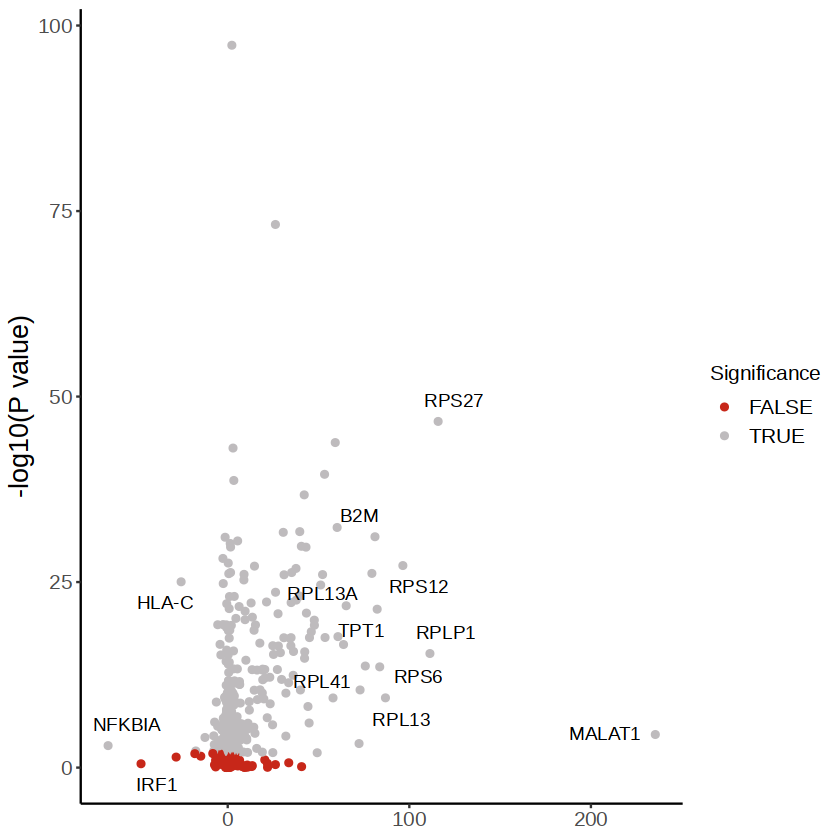

In [7]:
# Bl1
Bl1 <- all.markers[all.markers$NKsub=="Bl1",]
Bl1$Significance <- ifelse(Bl1$p_val < 0.01, TRUE, FALSE)
Bl1 <- Bl1[order(Bl1[,2],decreasing = T),]
top10 <- rbind(head(Bl1,10),tail(Bl1,10))
p.Bl1 <- ggplot(Bl1, aes(avg_log2FC,-log10(p_val))) +
  geom_point(aes(col = Significance)) +
  scale_color_manual(values = c("#C72719","#BEBBBD")) +
  geom_text_repel(data = top10, aes(label = rownames(top10)),
                  box.padding = unit(0.5,'lines'), point.padding = unit(0.8,'lines'),
                  segment.color = "black", show.legend = F) +
  theme_classic() + ylab("-log10(P value)") + mytheme
p.Bl1

In [8]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.Bl1.DEgenes.pdf",p.Bl1,width = 6,height = 5)

Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


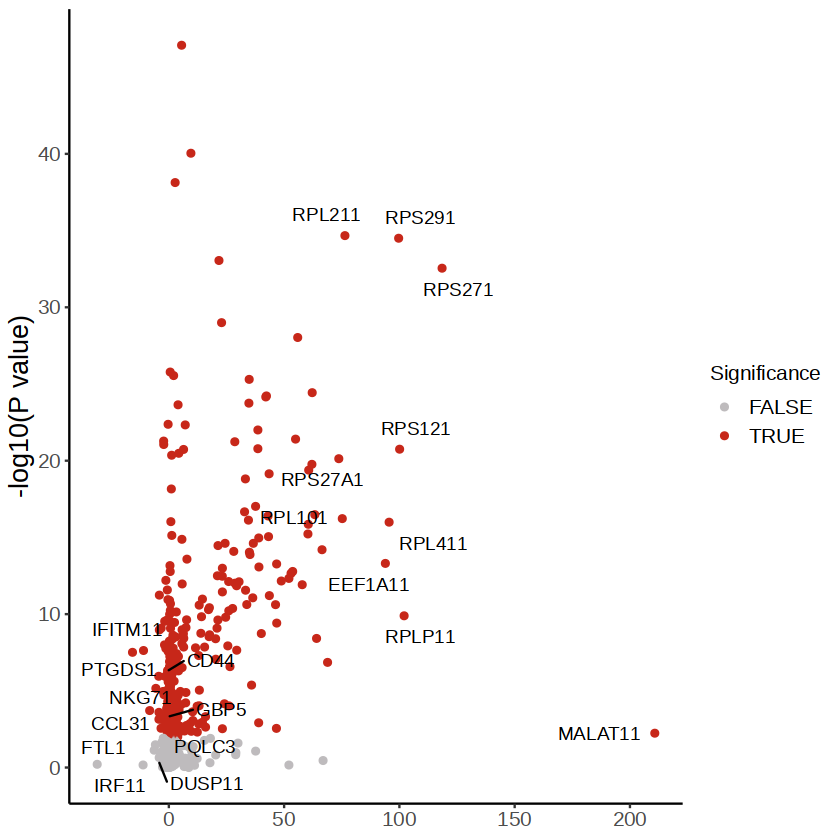

In [10]:
# Bl2
Bl2 <- all.markers[all.markers$NKsub=="Bl2",]
Bl2$Significance <- ifelse(Bl2$p_val < 0.01, TRUE, FALSE)
Bl2 <- Bl2[order(Bl2[,2],decreasing = T),]
top10 <- rbind(head(Bl2,10),tail(Bl2,10))
p.Bl2 <- ggplot(Bl2, aes(avg_log2FC,-log10(p_val))) +
  geom_point(aes(col = Significance)) +
  scale_color_manual(values = c("#BEBBBD","#C72719")) +
  geom_text_repel(data = top10, aes(label = rownames(top10)),
                  box.padding = unit(0.5,'lines'), point.padding = unit(0.8,'lines'),
                  segment.color = "black", show.legend = F) +
  theme_classic() + ylab("-log10(P value)") + mytheme
p.Bl2

In [11]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.Bl2.DEgenes.pdf",p.Bl2,width = 6,height = 5)

Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


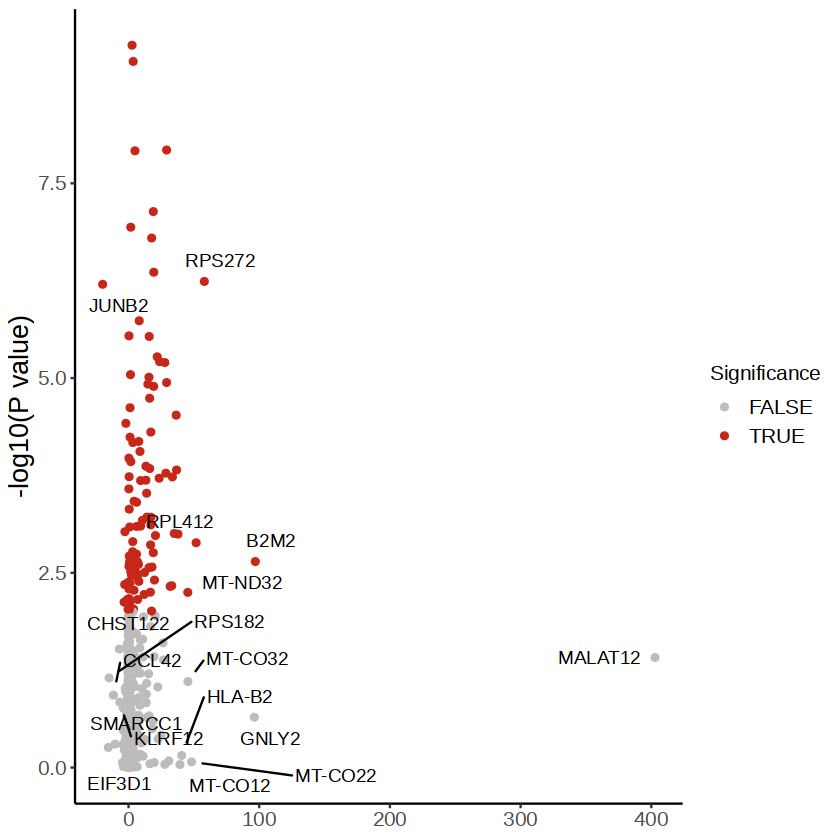

In [12]:
# Bl3
Bl3 <- all.markers[all.markers$NKsub=="Bl3",]
Bl3$Significance <- ifelse(Bl3$p_val < 0.01, TRUE, FALSE)
Bl3 <- Bl3[order(Bl3[,2],decreasing = T),]
top10 <- rbind(head(Bl3,10),tail(Bl3,10))
p.Bl3 <- ggplot(Bl3, aes(avg_log2FC,-log10(p_val))) +
  geom_point(aes(col = Significance)) +
  scale_color_manual(values = c("#BEBBBD","#C72719")) +
  geom_text_repel(data = top10, aes(label = rownames(top10)),
                  box.padding = unit(0.5,'lines'), point.padding = unit(0.8,'lines'),
                  segment.color = "black", show.legend = F) +
  theme_classic() + ylab("-log10(P value)") + mytheme
p.Bl3

In [13]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.Bl3.DEgenes.pdf",p.Bl3,width = 6,height = 5)

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [14]:
save(all.markers, file = "/home/suyanchi/project/dab/results/case/out/CD45pPBMC.NK.sub.HPV+_vs_PHV-.rda")

In [19]:
#----- Extract Diff genes for visualization ----
# Bl1
Bl1 <- subset(CD45pPBMC.NK, cells = rownames(subset(CD45pPBMC.NK@meta.data, classI == "Bl1")))
Idents(Bl1) <- Bl1$HPV
Bl1.diff <- all.markers[all.markers$NKsub == "Bl1",]
Bl1.diff <- Bl1.diff[order(Bl1.diff[,2],decreasing = T),]
Bl1.gene <- unique(rownames(Bl1.diff))
Bl1.m <- match(Bl1.gene, rownames(Bl1))
Bl1.gene <- rownames(Bl1)[Bl1.m]
Bl1.gene <- Bl1.gene[!is.na(Bl1.gene)]
diff.exp <- AverageExpression(Bl1, assays = "RNA", features = Bl1.gene,slot = "scale.data")
diff.exp <- as.data.frame(diff.exp$RNA) 
diff.exp$'HPV+' = diff.exp$Pos
diff.exp$'HPV-' <- diff.exp$Neg
diff.exp$Pos <- NULL; diff.exp$Neg <- NULL
diff.exp <- t(diff.exp)
pheatmap(diff.exp, cluster_rows = F,cluster_cols = F,border_color = NA,
         color = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256)),
         gaps_row = 1, filename = "/home/suyanchi/project/dab/results/case/figures/Bl1.tmp.pdf",width = 14,height = 3)
pheatmap(diff.exp, cluster_rows = F,cluster_cols = F,border_color = NA,
         color = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256)),
         filename = "/home/suyanchi/project/dab/results/case/figures/Bl1.pdf",width = 8,height = 1.5,legend = F)

In [20]:
# Bl2
Bl2 <- subset(CD45pPBMC.NK, cells = rownames(subset(CD45pPBMC.NK@meta.data, classI == "Bl2")))
Idents(Bl2) <- Bl2$HPV
Bl2.diff <- all.markers[all.markers$NKsub == "Bl2",]
Bl2.diff <- Bl2.diff[order(Bl2.diff[,2],decreasing = T),]
Bl2.gene <- unique(rownames(Bl2.diff))
Bl2.m <- match(Bl2.gene, rownames(Bl2))
Bl2.gene <- rownames(Bl2)[Bl2.m]
Bl2.gene <- Bl2.gene[!is.na(Bl2.gene)]
diff.exp <- AverageExpression(Bl2, assays = "RNA", features = Bl2.gene,slot = "scale.data")
diff.exp <- as.data.frame(diff.exp$RNA) 
diff.exp$`HPV+` <- diff.exp$Pos; diff.exp$`HPV-` <- diff.exp$Neg
diff.exp$Pos <- NULL; diff.exp$Neg <- NULL
diff.exp <- t(diff.exp)
tmp <- diff.exp
tmp[tmp > 0.4] <- 0.4
tmp[tmp < -0.2] <- -0.2
pheatmap(tmp, cluster_rows = F,cluster_cols = F,border_color = NA,
         color = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256)),
         gaps_row = 1, filename = "/home/suyanchi/project/dab/results/case/figures/Bl2.tmp.pdf",width = 14,height = 3)
pheatmap(tmp, cluster_rows = F,cluster_cols = F,border_color = NA,
         color = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256)),
         filename = "/home/suyanchi/project/dab/results/case/figures/Bl2.pdf",width = 8,height = 1.5,legend = F)

In [21]:
# Bl3
Bl3 <- subset(CD45pPBMC.NK, cells = rownames(subset(CD45pPBMC.NK@meta.data, classI == "Bl3")))
Idents(Bl3) <- Bl3$HPV
Bl3.diff <- all.markers[all.markers$NKsub == "Bl3",]
Bl3.diff <- Bl3.diff[order(Bl3.diff[,2],decreasing = T),]
Bl3.gene <- unique(rownames(Bl3.diff))
Bl3.m <- match(Bl3.gene, rownames(Bl3))
Bl3.gene <- rownames(Bl3)[Bl3.m]
Bl3.gene <- Bl3.gene[!is.na(Bl3.gene)]
diff.exp <- AverageExpression(Bl3, assays = "RNA", features = Bl3.gene,slot = "scale.data")
diff.exp <- as.data.frame(diff.exp$RNA) 
diff.exp$`HPV+` <- diff.exp$Pos; diff.exp$`HPV-` <- diff.exp$Neg
diff.exp$Pos <- NULL; diff.exp$Neg <- NULL
diff.exp <- t(diff.exp)
tmp <- diff.exp
tmp[tmp > 0.4] <- 0.4
tmp[tmp < -0.2] <- -0.2
pheatmap(tmp, cluster_rows = F,cluster_cols = F,border_color = NA,
         color = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256)),
         gaps_row = 1, filename = "/home/suyanchi/project/dab/results/case/figures/Bl3.tmp.pdf",width = 14,height = 3)
pheatmap(tmp, cluster_rows = F,cluster_cols = F,border_color = NA,
         color = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256)),
         filename = "/home/suyanchi/project/dab/results/case/figures/Bl3.pdf",width = 8,height = 1.5,legend = F)